In [5]:
import webdataset as wds
import numpy as np
import io
import random

# Load the tar file
dataset = wds.WebDataset("../../data/jump_0.01percent//train/shard_00000000.tar")

# Convert dataset to a list for random access (careful with large datasets)
samples = list(iter(dataset))


# Function to inspect random samples
def inspect_random_samples(samples, num_samples=5):
    print(f"Total samples in dataset: {len(samples)}")
    for i in range(num_samples):
        # Choose a random sample
        random_index = random.randint(0, len(samples) - 1)
        sample = samples[random_index]

        # Load the numpy array
        img_array = np.load(io.BytesIO(sample["image.npy"]))  # (5, H, W)

        # Print the shape and value range
        print(f"Sample {i + 1}:")
        print(f"  Image array shape: {img_array.shape}")
        print(f"  Value range: {img_array.min()} - {img_array.max()}")
        print("---")


# Inspect 5 random samples
inspect_random_samples(samples, num_samples=20)

Total samples in dataset: 10
Sample 1:
  Image array shape: (5, 512, 512)
  Value range: 215.67263793945312 - 54102.1796875
---
Sample 2:
  Image array shape: (5, 512, 512)
  Value range: 215.67263793945312 - 54102.1796875
---
Sample 3:
  Image array shape: (5, 512, 512)
  Value range: 223.3341827392578 - 65535.00390625
---
Sample 4:
  Image array shape: (5, 512, 512)
  Value range: 213.3119659423828 - 50492.37890625
---
Sample 5:
  Image array shape: (5, 512, 512)
  Value range: 223.3341827392578 - 65535.00390625
---
Sample 6:
  Image array shape: (5, 512, 512)
  Value range: 244.43601989746094 - 62709.9453125
---
Sample 7:
  Image array shape: (5, 512, 512)
  Value range: 215.67263793945312 - 54102.1796875
---
Sample 8:
  Image array shape: (5, 512, 512)
  Value range: 244.43601989746094 - 62709.9453125
---
Sample 9:
  Image array shape: (5, 512, 512)
  Value range: 110.26394653320312 - 65535.00390625
---
Sample 10:
  Image array shape: (5, 512, 512)
  Value range: 244.43601989746094

/Users/lapuerta/miniconda3/envs/ldm/lib/python3.12/site-packages/webdataset/compat.py:136: UserWarning: WebDataset(shardshuffle=...) is None; set explicitly to False or a number
  warnings.warn("WebDataset(shardshuffle=...) is None; set explicitly to False or a number")


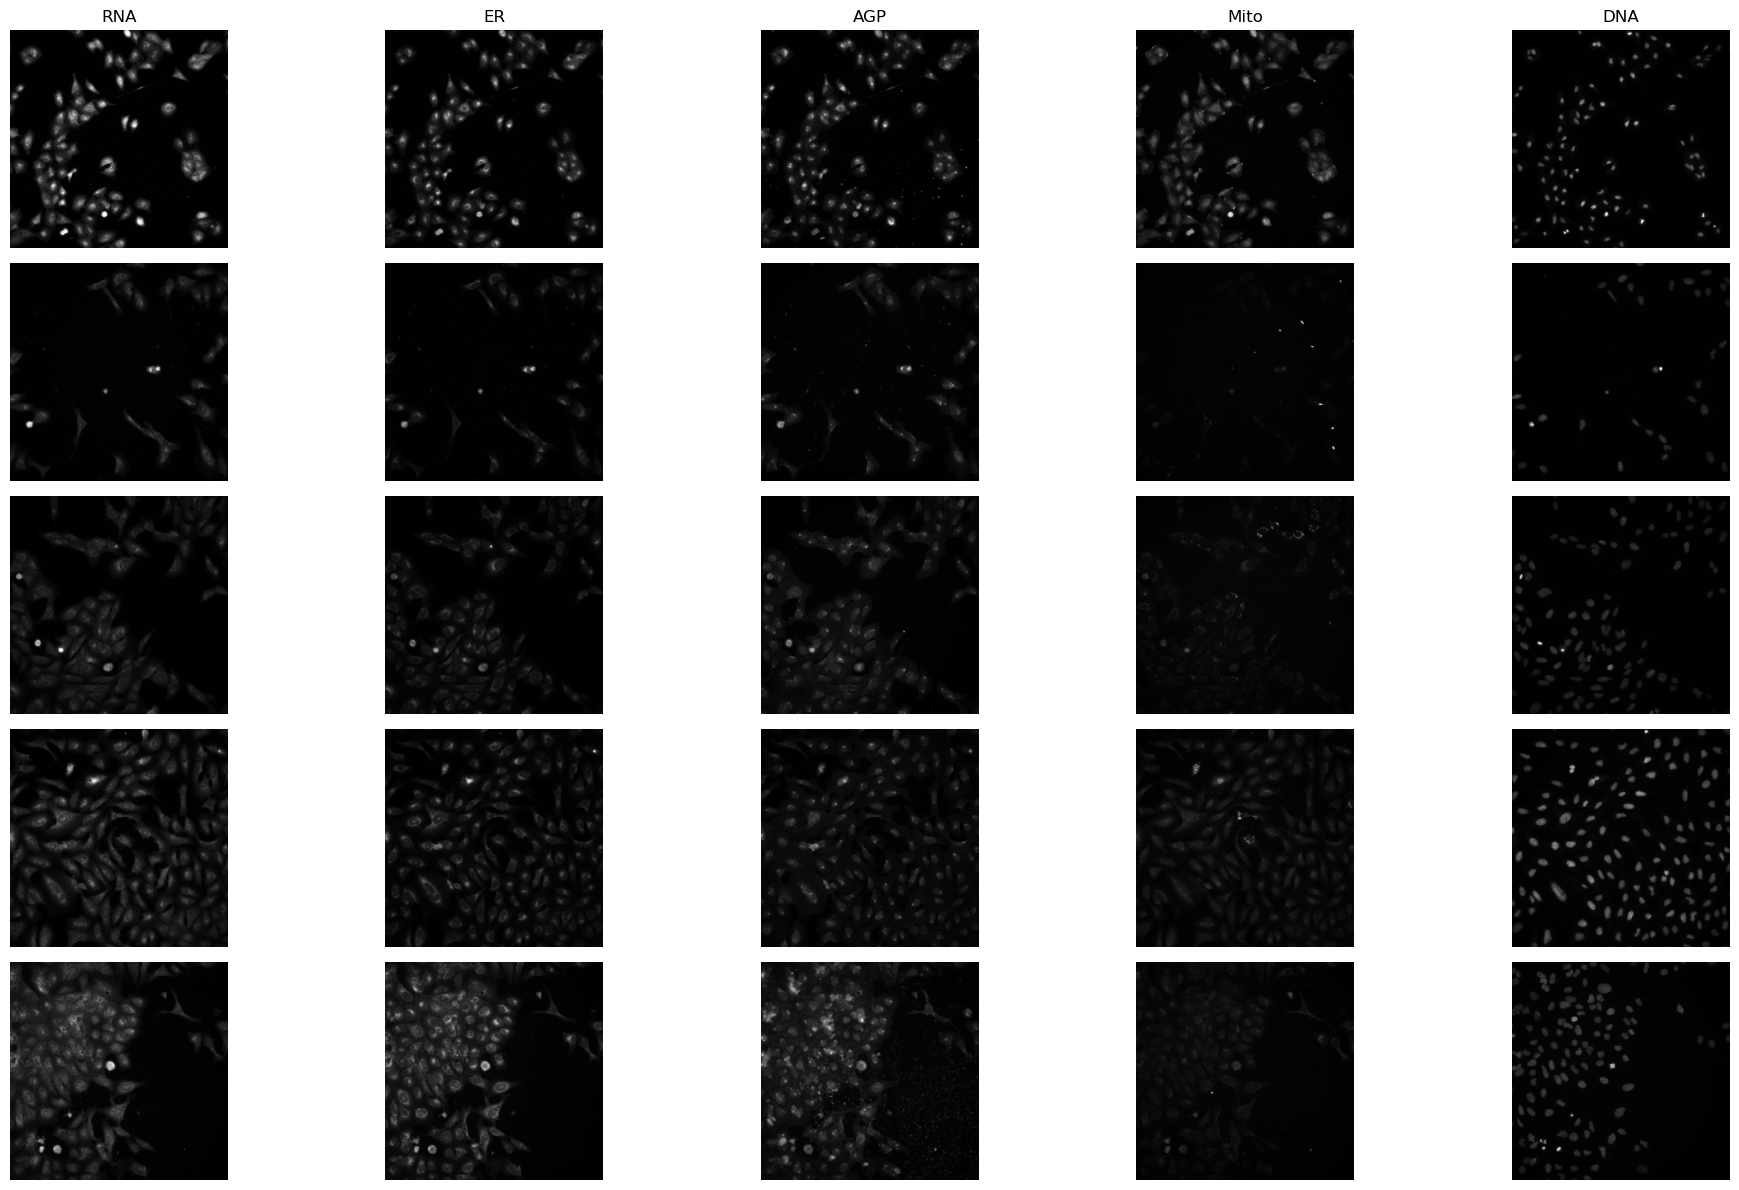

In [8]:
import matplotlib.pyplot as plt

# Create a single iterator
dataset_iter = iter(dataset)
channels = ["RNA", "ER", "AGP", "Mito", "DNA"]

# Show multiple different samples
fig, axes = plt.subplots(5, 5, figsize=(20, 12))
for row_idx in range(5):
    # Use the same iterator
    sample = next(dataset_iter)
    img_array = np.load(io.BytesIO(sample["image.npy"]))

    for ax, channel, img in zip(axes[row_idx], channels, img_array):
        ax.imshow(img, cmap="gray")
        ax.set_title(channel if row_idx == 0 else "")
        ax.axis("off")

plt.tight_layout()
plt.show()

Total samples in dataset: 10
Sample 1 (index=2):
  Image array shape: (5, 512, 512)
  Value range: 216.62454223632812 - 65535.01171875
---
Sample 2 (index=7):
  Image array shape: (5, 512, 512)
  Value range: 111.29711151123047 - 65535.01171875
---
Sample 3 (index=8):
  Image array shape: (5, 512, 512)
  Value range: 207.09014892578125 - 65534.99609375
---
Sample 4 (index=2):
  Image array shape: (5, 512, 512)
  Value range: 216.62454223632812 - 65535.01171875
---
Sample 5 (index=8):
  Image array shape: (5, 512, 512)
  Value range: 207.09014892578125 - 65534.99609375
---


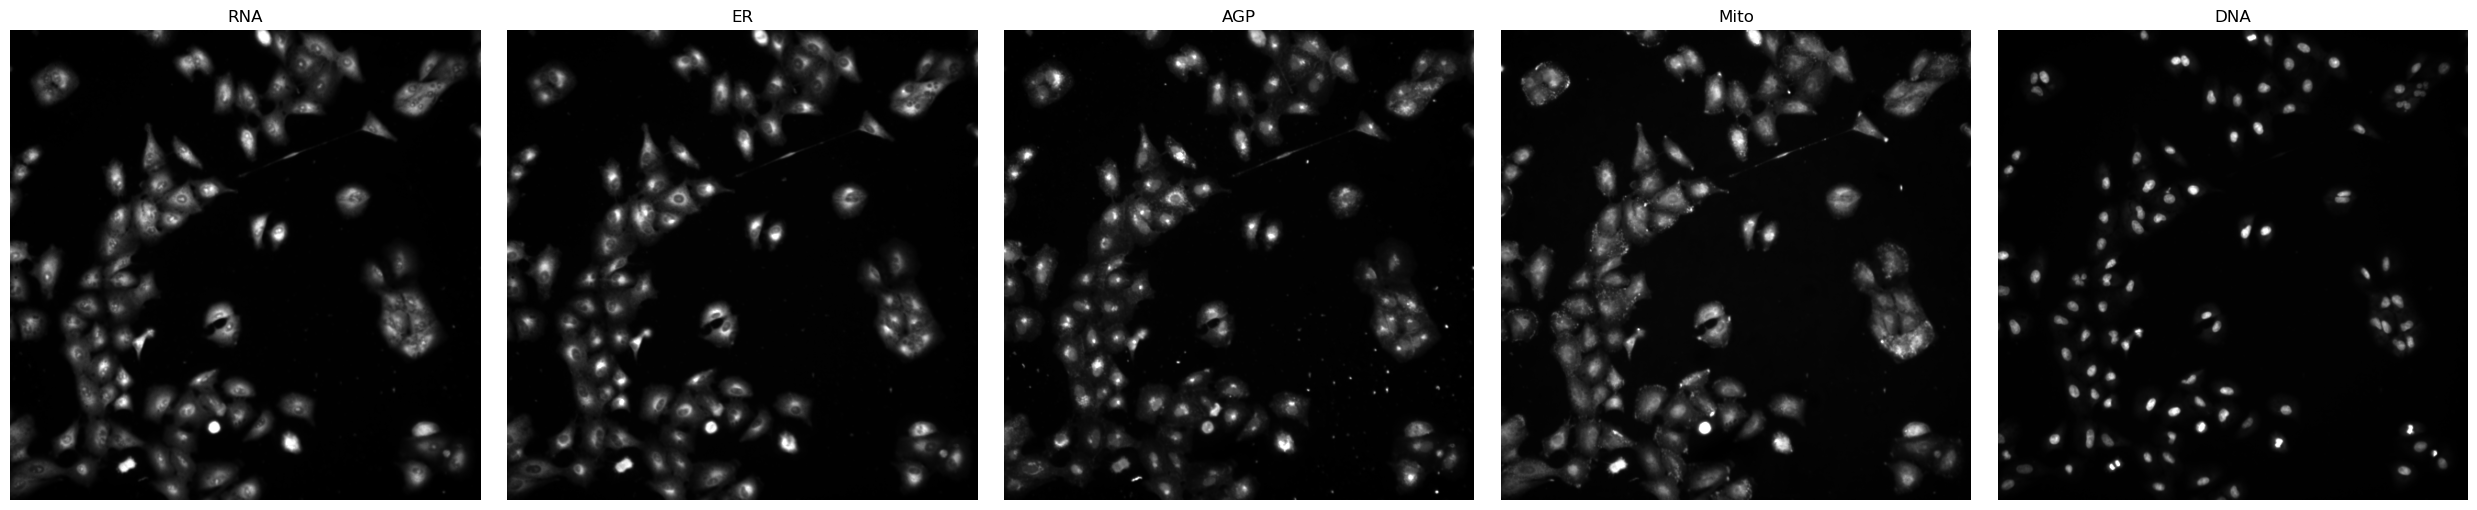

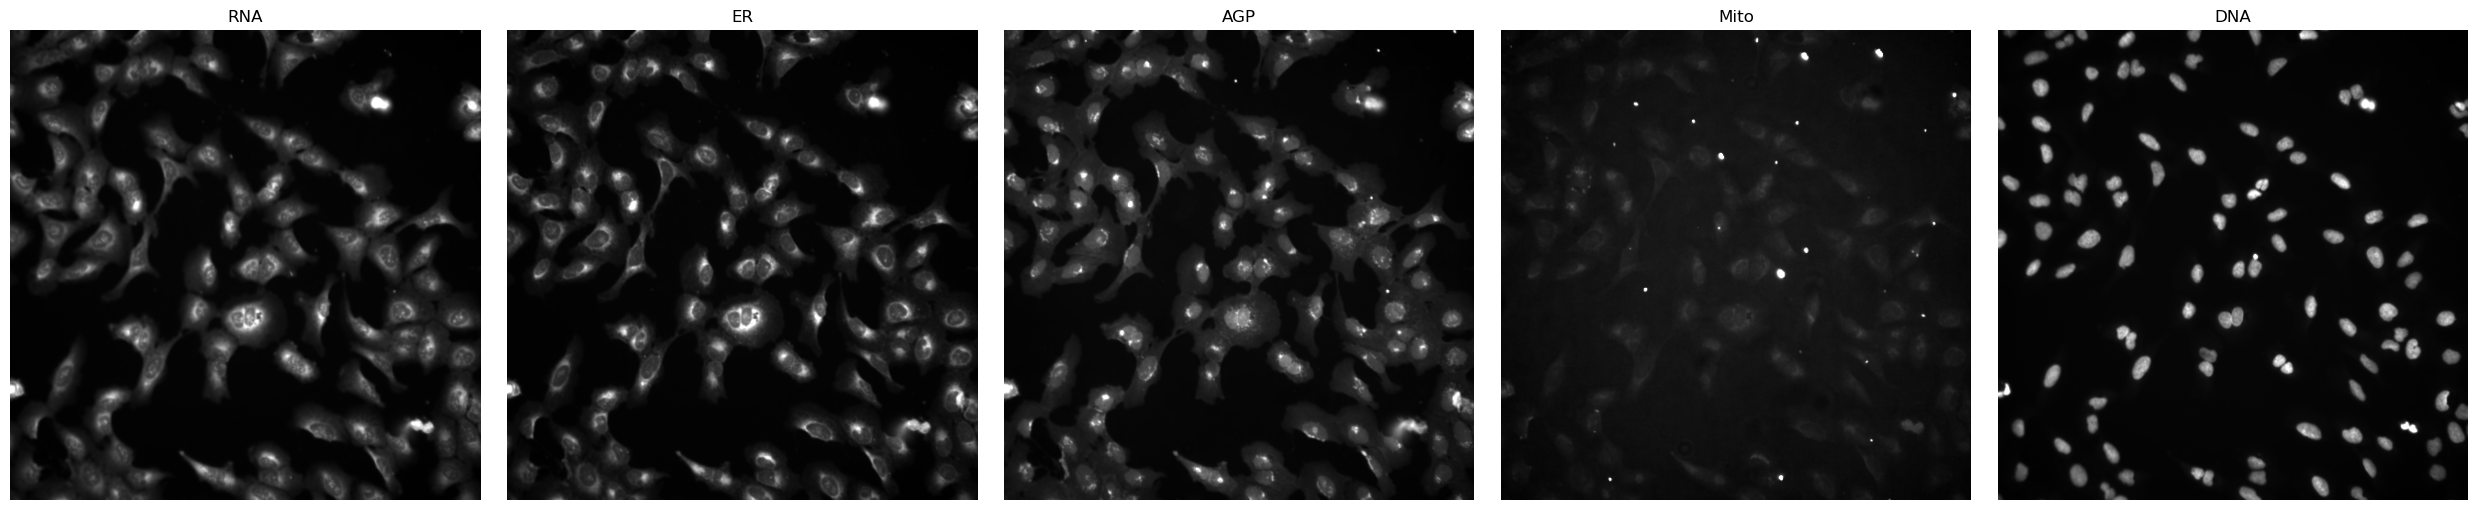

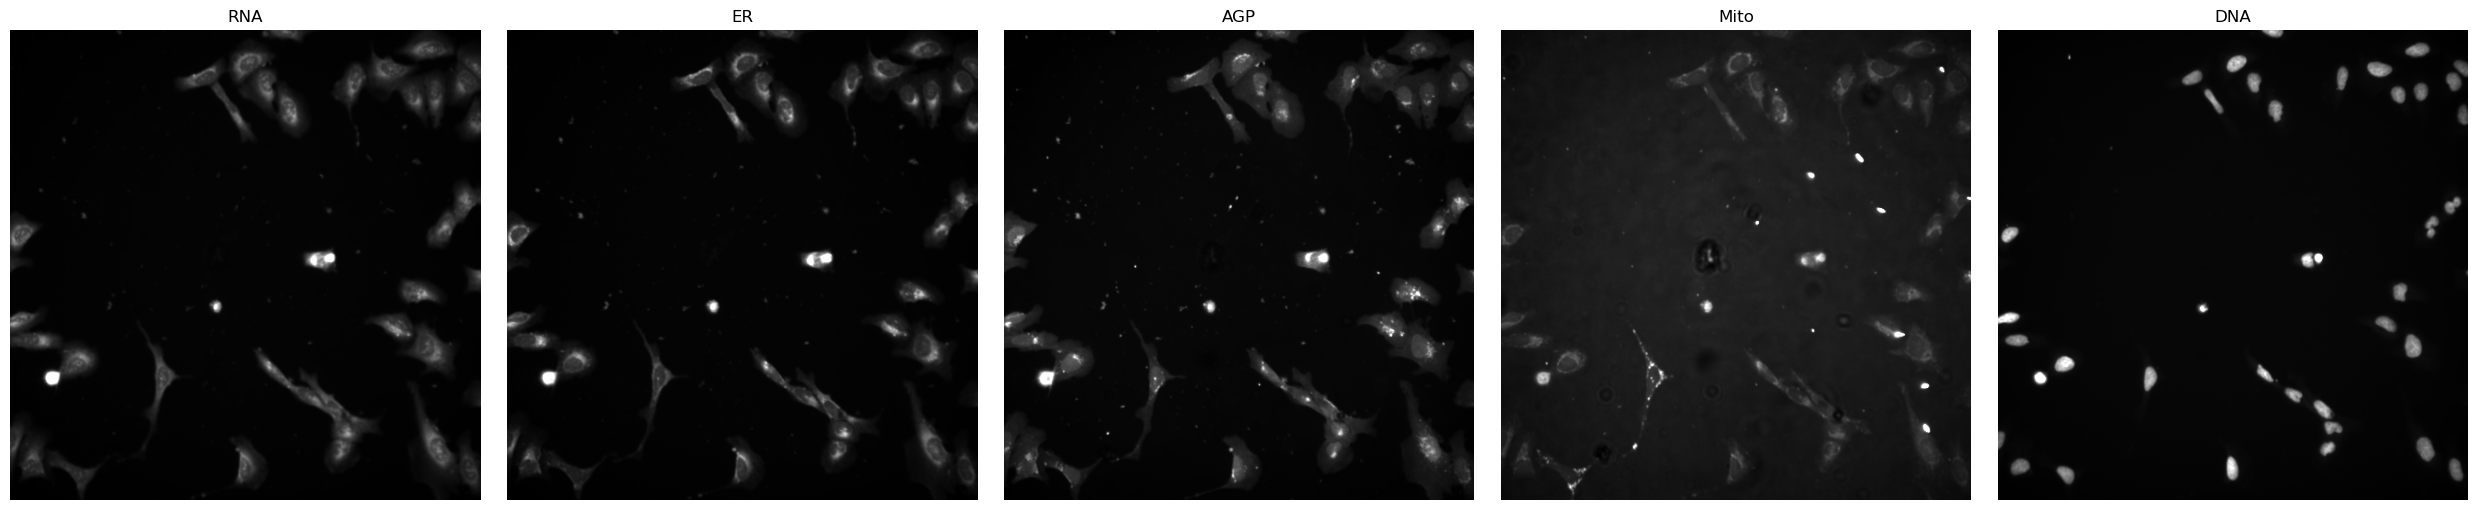

In [9]:
import webdataset as wds
import numpy as np
import io
import random
import matplotlib.pyplot as plt

# Path to a specific shard (or pattern)
data_path = "../../data/jump_0.01percent/train/shard_00000000.tar"

# Load the dataset
dataset = wds.WebDataset(data_path)

# Convert to list for easy random access (caution: only for small shards)
samples = list(iter(dataset))

channels = ["RNA", "ER", "AGP", "Mito", "DNA"]


def show_raw_sample(sample, channels=channels, int_percentile=99.9):
    """
    Display each channel of a raw Cell Painting sample in a single row.

    Args:
        sample (dict): The sample dictionary from WebDataset (contains "image.npy").
        channels (list of str): Channel names (just for titles).
        int_percentile (float): Percentile used for display scaling.
            This does NOT alter the data; it's only so we can see details.
    """
    # Load the raw NumPy array directly from bytes
    img_array = np.load(io.BytesIO(sample["image.npy"]))  # shape: (5, H, W)

    # We'll display all 5 channels side by side
    fig, axes = plt.subplots(1, len(channels), figsize=(5 * len(channels), 5))

    # Make axes iterable even if channels=1
    if len(channels) == 1:
        axes = [axes]

    for ax, channel, img in zip(axes, channels, img_array):
        # Scale intensities by the chosen percentile for a better view
        vmax = np.percentile(img, int_percentile)
        vmax = max(vmax, 1e-6)
        # Clip and scale to [0,1] for display
        img_disp = np.clip(img / vmax, 0, 1)

        ax.imshow(img_disp, cmap="gray")
        ax.set_title(channel)
        ax.axis("off")

    plt.tight_layout()
    plt.show()


def inspect_random_samples(samples, num_samples=5):
    """
    Randomly pick a few samples from the WebDataset and display
    their raw shapes/ranges (no normalization).
    """
    print(f"Total samples in dataset: {len(samples)}")
    for i in range(num_samples):
        rand_index = random.randint(0, len(samples) - 1)
        sample = samples[rand_index]

        # Load the array
        img_array = np.load(io.BytesIO(sample["image.npy"]))  # shape: (5, H, W)

        # Show some stats about it
        print(f"Sample {i+1} (index={rand_index}):")
        print(f"  Image array shape: {img_array.shape}")
        print(f"  Value range: {img_array.min()} - {img_array.max()}")
        print("---")


# 1) Inspect random samples without normalization
inspect_random_samples(samples, num_samples=5)

# 2) Display a few raw samples visually
#    We'll pick random ones or you can select them by index
for _ in range(3):
    rand_index = random.randint(0, len(samples) - 1)
    show_raw_sample(samples[rand_index], channels=channels, int_percentile=99.9)

In [24]:
import webdataset as wds
import numpy as np
import torch
import io
import random
import matplotlib.pyplot as plt

from torchvision import transforms


########################################
# Your original transforms
########################################
class NumpyLoader(torch.nn.Module):
    """Load numpy array from bytes."""

    def forward(self, x):
        arr = np.load(io.BytesIO(x), allow_pickle=False)
        return torch.from_numpy(arr).float()  # shape (C, H, W)


class EfficientMinMaxNormalize(torch.nn.Module):
    """MinMax normalization to [0,1], channel-wise."""

    def forward(self, x):
        # x is shape (C, H, W)
        c, h, w = x.shape
        x_reshaped = x.view(c, -1)  # [C, H*W]

        min_vals = x_reshaped.min(dim=1, keepdim=True)[0]
        max_vals = x_reshaped.max(dim=1, keepdim=True)[0]

        x_reshaped = (x_reshaped - min_vals) / (max_vals - min_vals + 1e-8)
        return x_reshaped.view(c, h, w)


transform_pipeline = transforms.Compose(
    [
        NumpyLoader(),
        EfficientMinMaxNormalize(),  # => in [0,1]
        transforms.Normalize(
            mean=[0.5, 0.5, 0.5, 0.5, 0.5],  # shift [0,1] -> [-1,1]
            std=[0.5, 0.5, 0.5, 0.5, 0.5],
        ),
    ]
)


########################################
# Helper function: scale_for_display
########################################
def scale_for_display(img, percentile=99.9):
    """
    Clip/rescale a 2D array so you can see structure in a typical 0..1 grayscale.
    This does not change the underlying data—just for plotting.
    """
    v_max = np.percentile(img, percentile)
    v_max = max(v_max, 1e-6)
    return np.clip(img / v_max, 0, 1)


########################################
# The new show function
########################################
def show_pipeline_comparison_four_columns(sample, channels=None, percentile=99.9):
    """
    Show a single sample in four columns for each channel:
      1) Raw
      2) After MinMax [0,1]
      3) After final [-1,1]
      4) "Scaled back" to [0,1], exactly like we do for logging in wandb: (x*0.5 + 0.5)

    sample: a dict from WebDataset (with key "image.npy").
    channels: e.g. ["RNA","ER","AGP","Mito","DNA"] for labeling
    percentile: used in scale_for_display
    """

    if channels is None:
        channels = ["Channel1", "Channel2", "Channel3", "Channel4", "Channel5"]

    # --- 1) Load the raw data as NumPy ---
    raw_bytes = sample["image.npy"]
    raw_np = np.load(io.BytesIO(raw_bytes))  # shape (C, H, W)

    # Torch version for applying the pipeline step-by-step
    raw_torch = torch.from_numpy(raw_np).float()  # (C,H,W)

    # --- 2) Manually replicate your pipeline in steps ---
    # Step A: MinMax -> [0,1]
    minmax_torch = EfficientMinMaxNormalize()(raw_torch)

    # Step B: transforms.Normalize(...) -> [-1,1]
    final_torch = transforms.Normalize([0.5] * 5, [0.5] * 5)(minmax_torch)

    # Step C: "Scaled back" to [0,1] for visualization, as in wandb:
    # x_vis = (x * 0.5 + 0.5).clamp(0,1)
    final_vis_torch = (final_torch * 0.5 + 0.5).clamp(0, 1)

    # We'll display each channel in a row, 4 columns:
    # [ Raw, After MinMax, After Final [-1,1], Final Scaled to [0,1] ]
    c_count = raw_np.shape[0]
    fig, axes = plt.subplots(c_count, 4, figsize=(12, 3 * c_count))

    if c_count == 1:
        axes = np.array([axes])

    for c_idx in range(c_count):
        ch_name = channels[c_idx] if c_idx < len(channels) else f"ch{c_idx+1}"

        # Convert each step to numpy
        raw_ch = raw_torch[c_idx].cpu().numpy()
        minmax_ch = minmax_torch[c_idx].cpu().numpy()
        final_ch = final_torch[c_idx].cpu().numpy()
        final_vis_ch = final_vis_torch[c_idx].cpu().numpy()

        # Column 0: Raw
        axes[c_idx][0].imshow(scale_for_display(raw_ch, percentile), cmap="gray")
        axes[c_idx][0].set_title(f"{ch_name}\nRaw")
        axes[c_idx][0].axis("off")

        # Column 1: After MinMax
        axes[c_idx][1].imshow(scale_for_display(minmax_ch, percentile), cmap="gray")
        axes[c_idx][1].set_title("[0,1]\nMinMax")
        axes[c_idx][1].axis("off")

        # Column 2: After final [-1,1]
        # As you’ve noted, might appear almost black if displayed "as is".
        # We do a percentile-based approach for visualization.
        axes[c_idx][2].imshow(scale_for_display(final_ch, percentile), cmap="gray")
        axes[c_idx][2].set_title("[-1,1]\nFinal")
        axes[c_idx][2].axis("off")

        # Column 3: "Scaled back" to [0,1] for visuals
        axes[c_idx][3].imshow(scale_for_display(final_vis_ch, percentile), cmap="gray")
        axes[c_idx][3].set_title("Final → [0,1]\n(WandB)")
        axes[c_idx][3].axis("off")

    plt.tight_layout()
    plt.show()

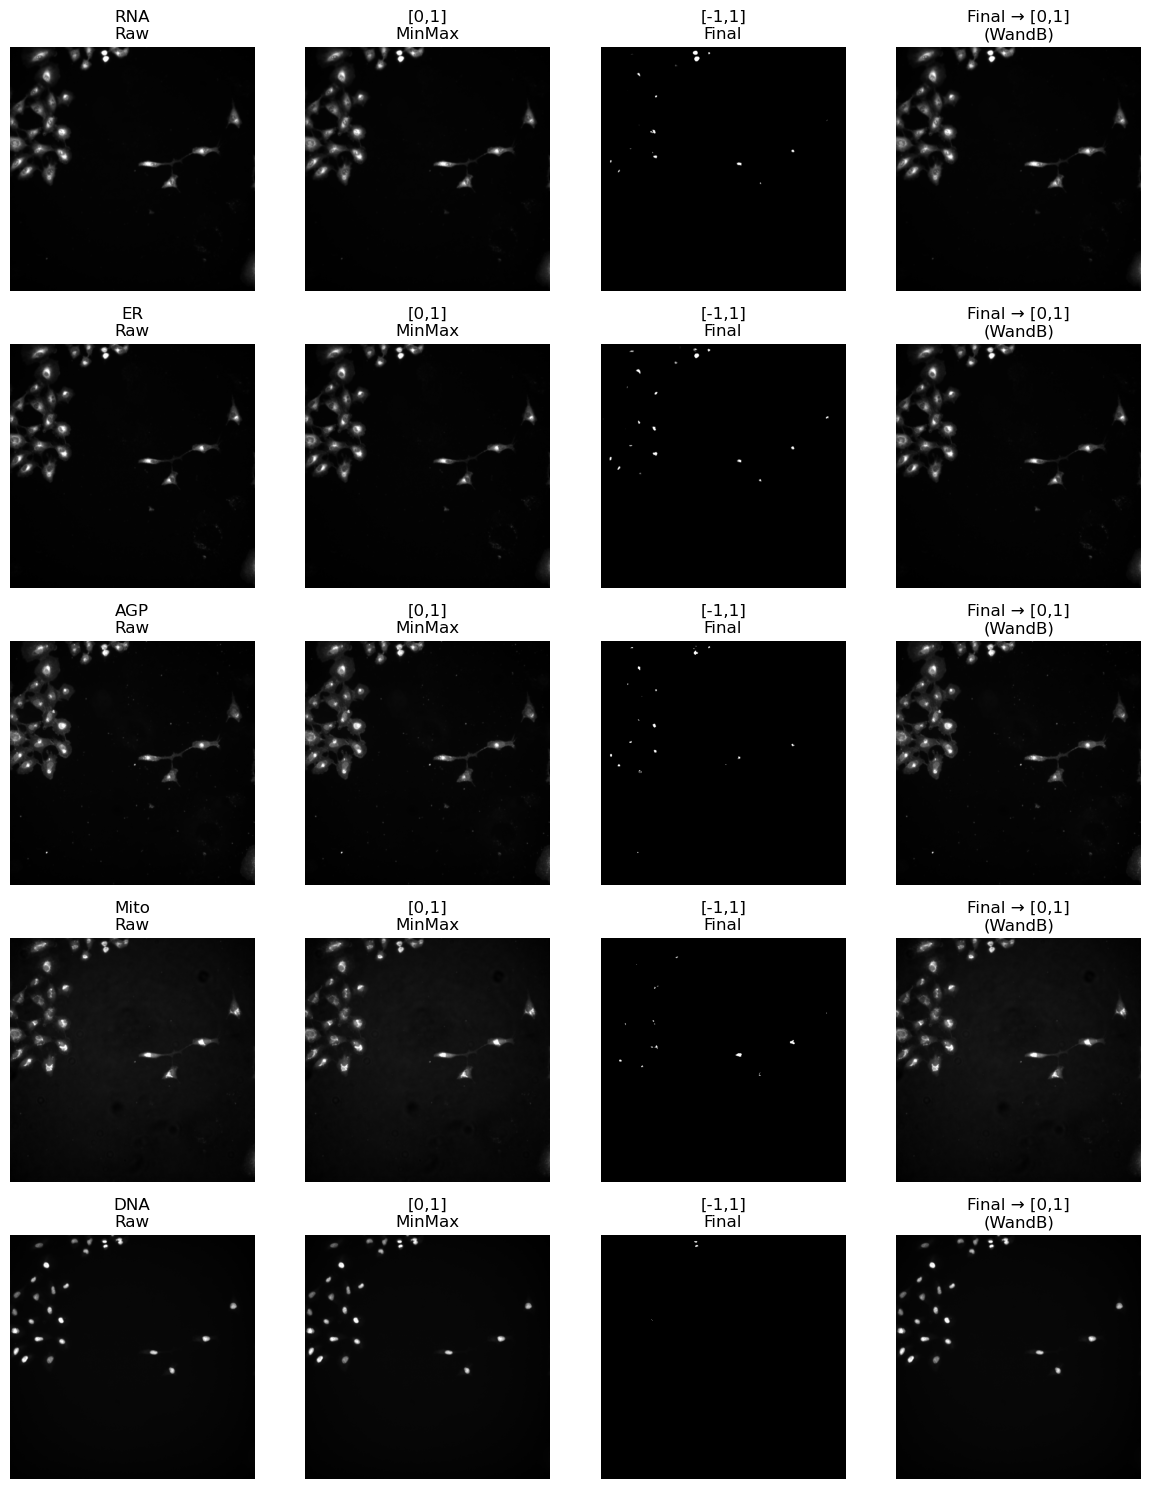

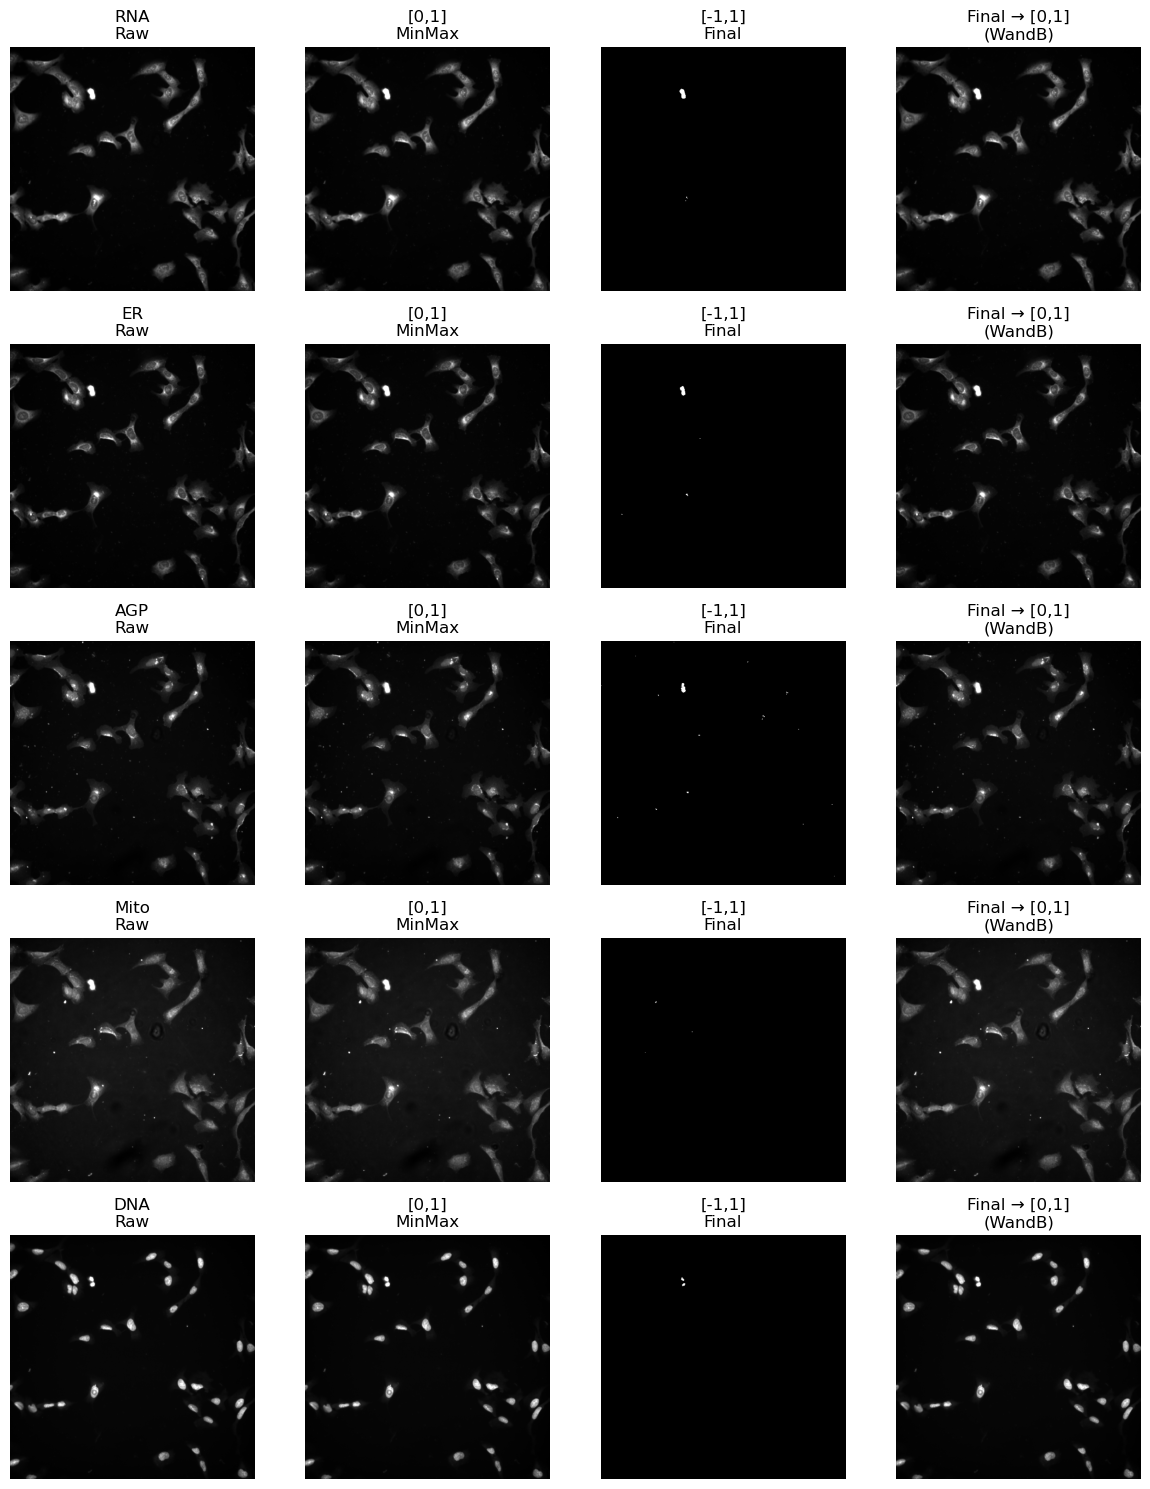

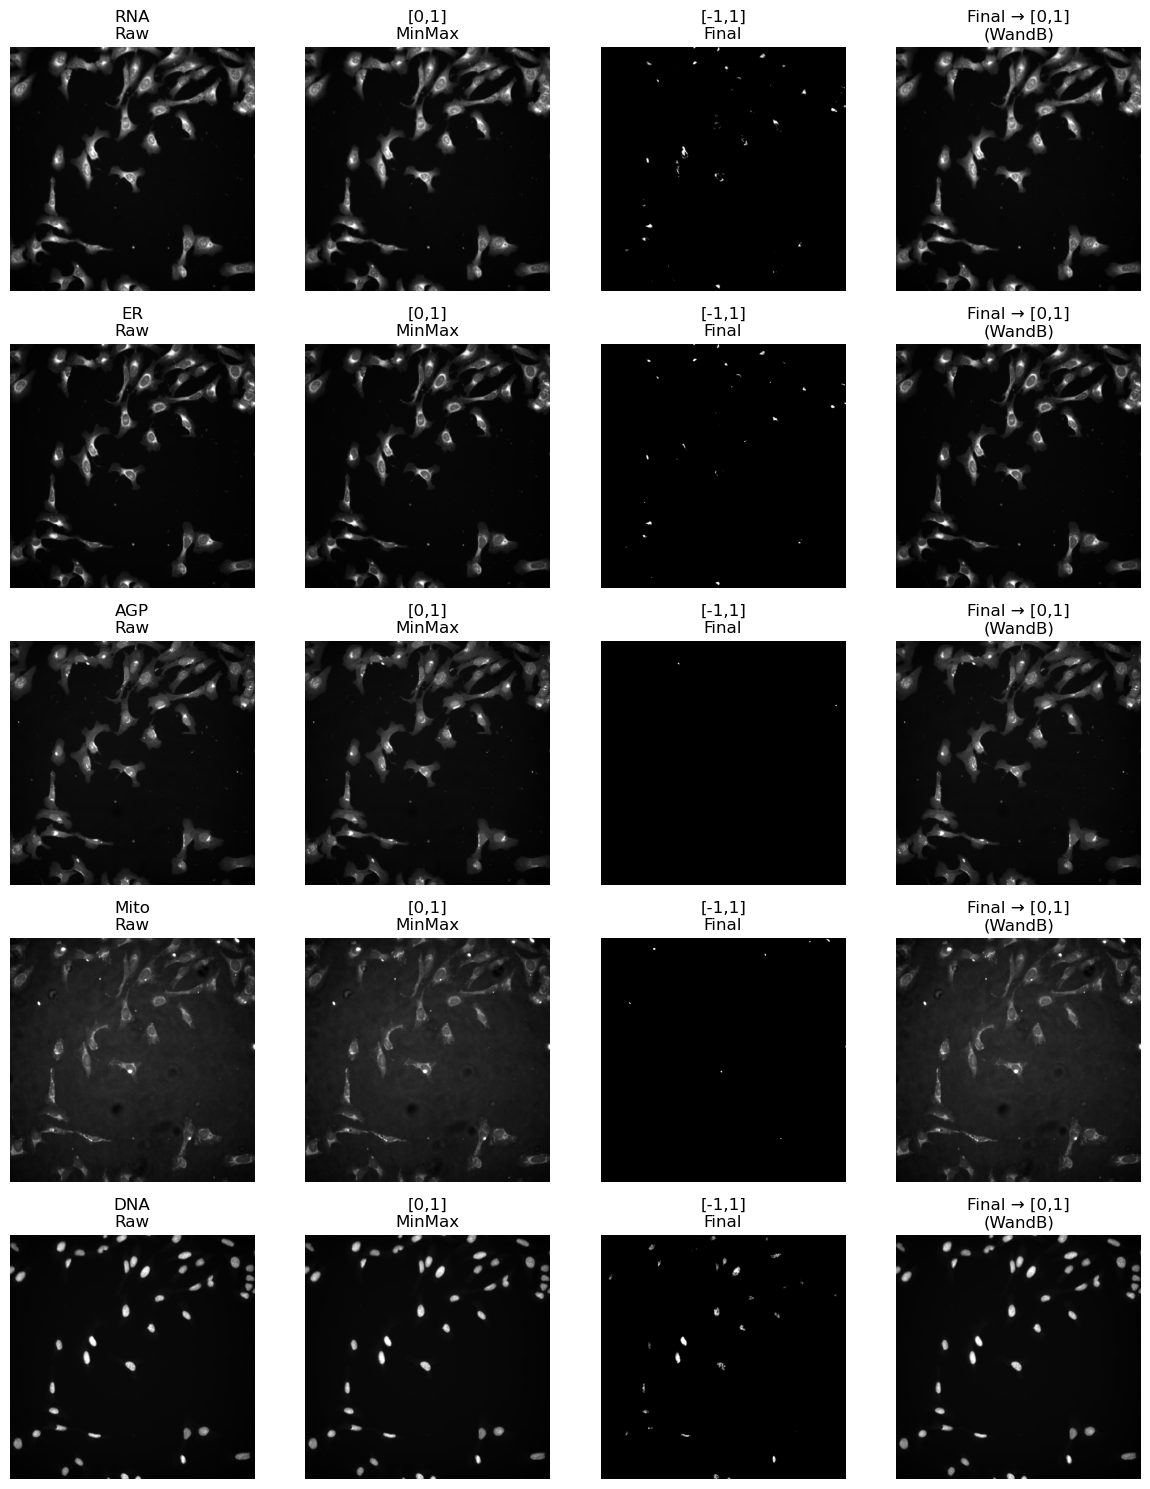

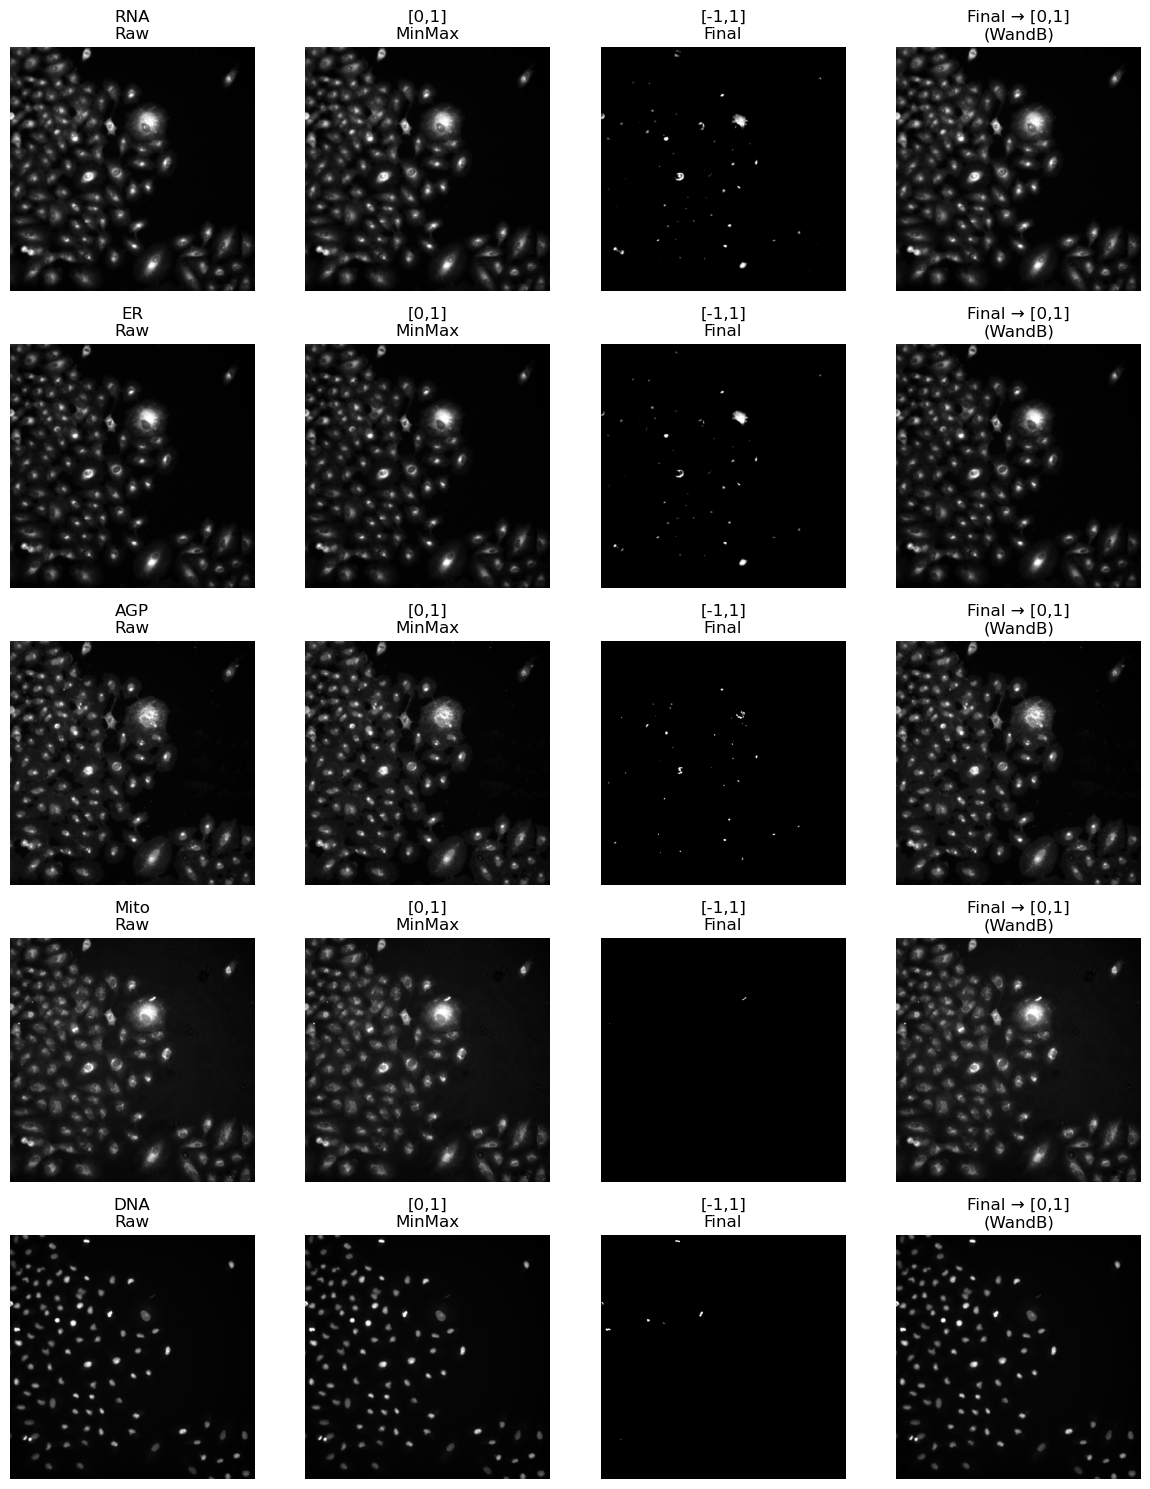

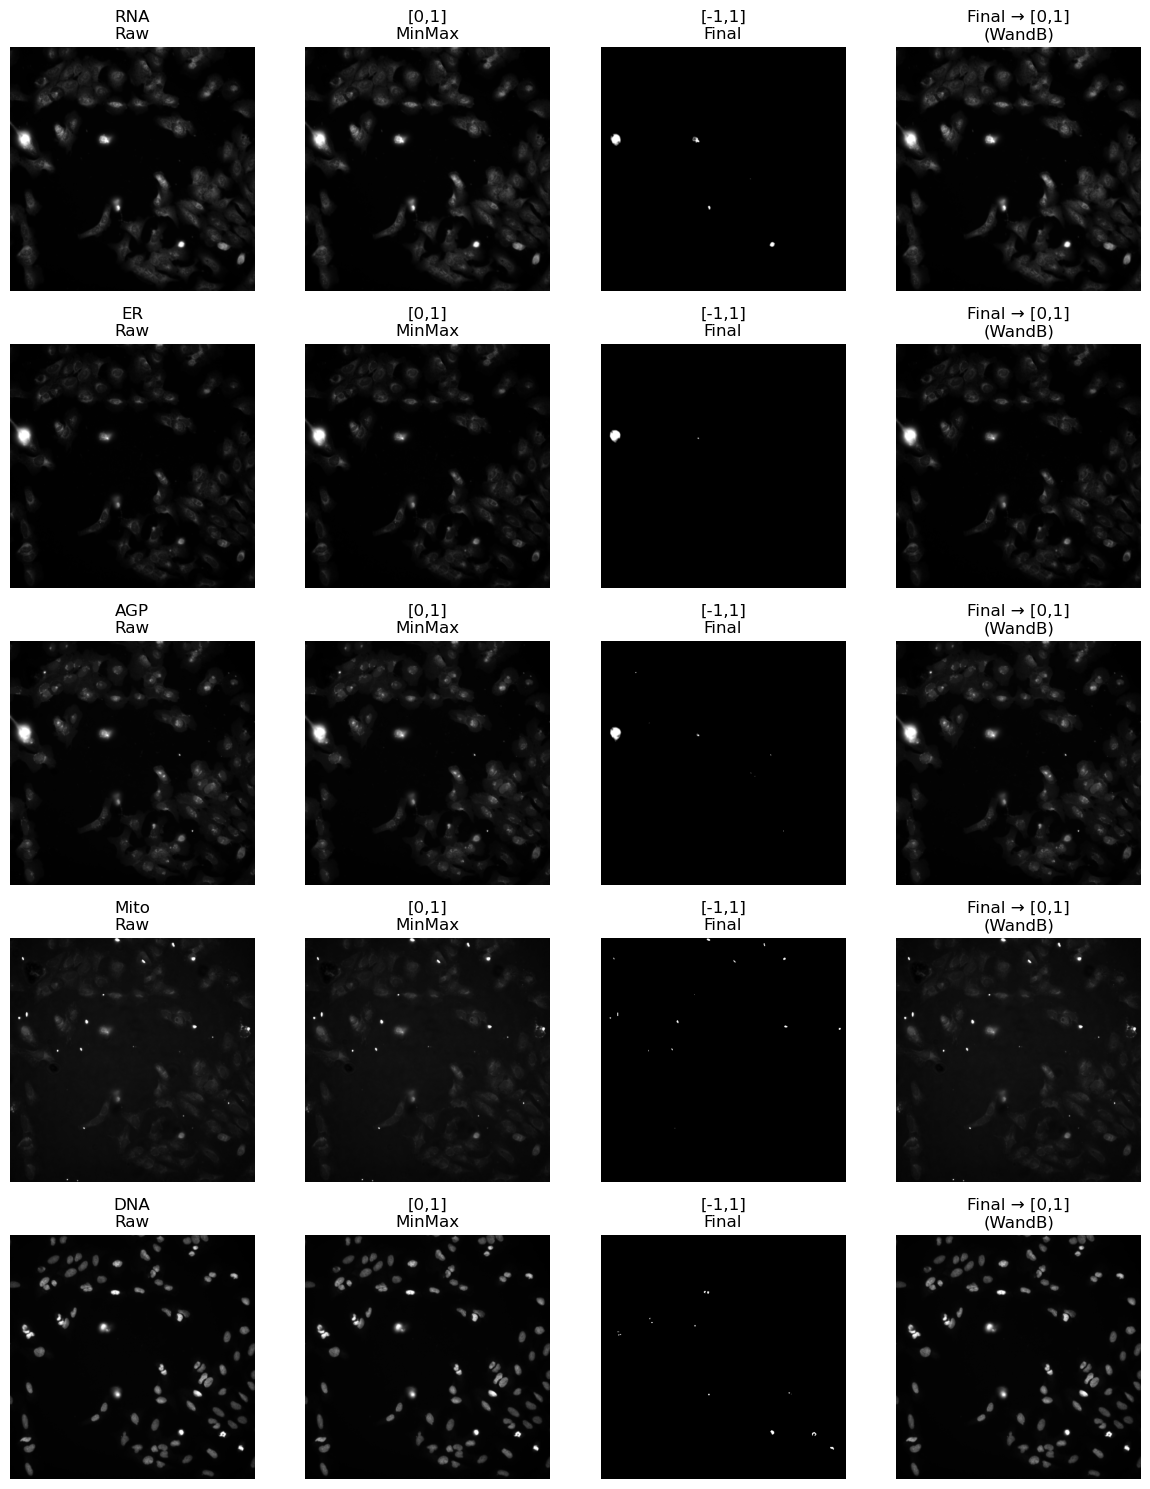

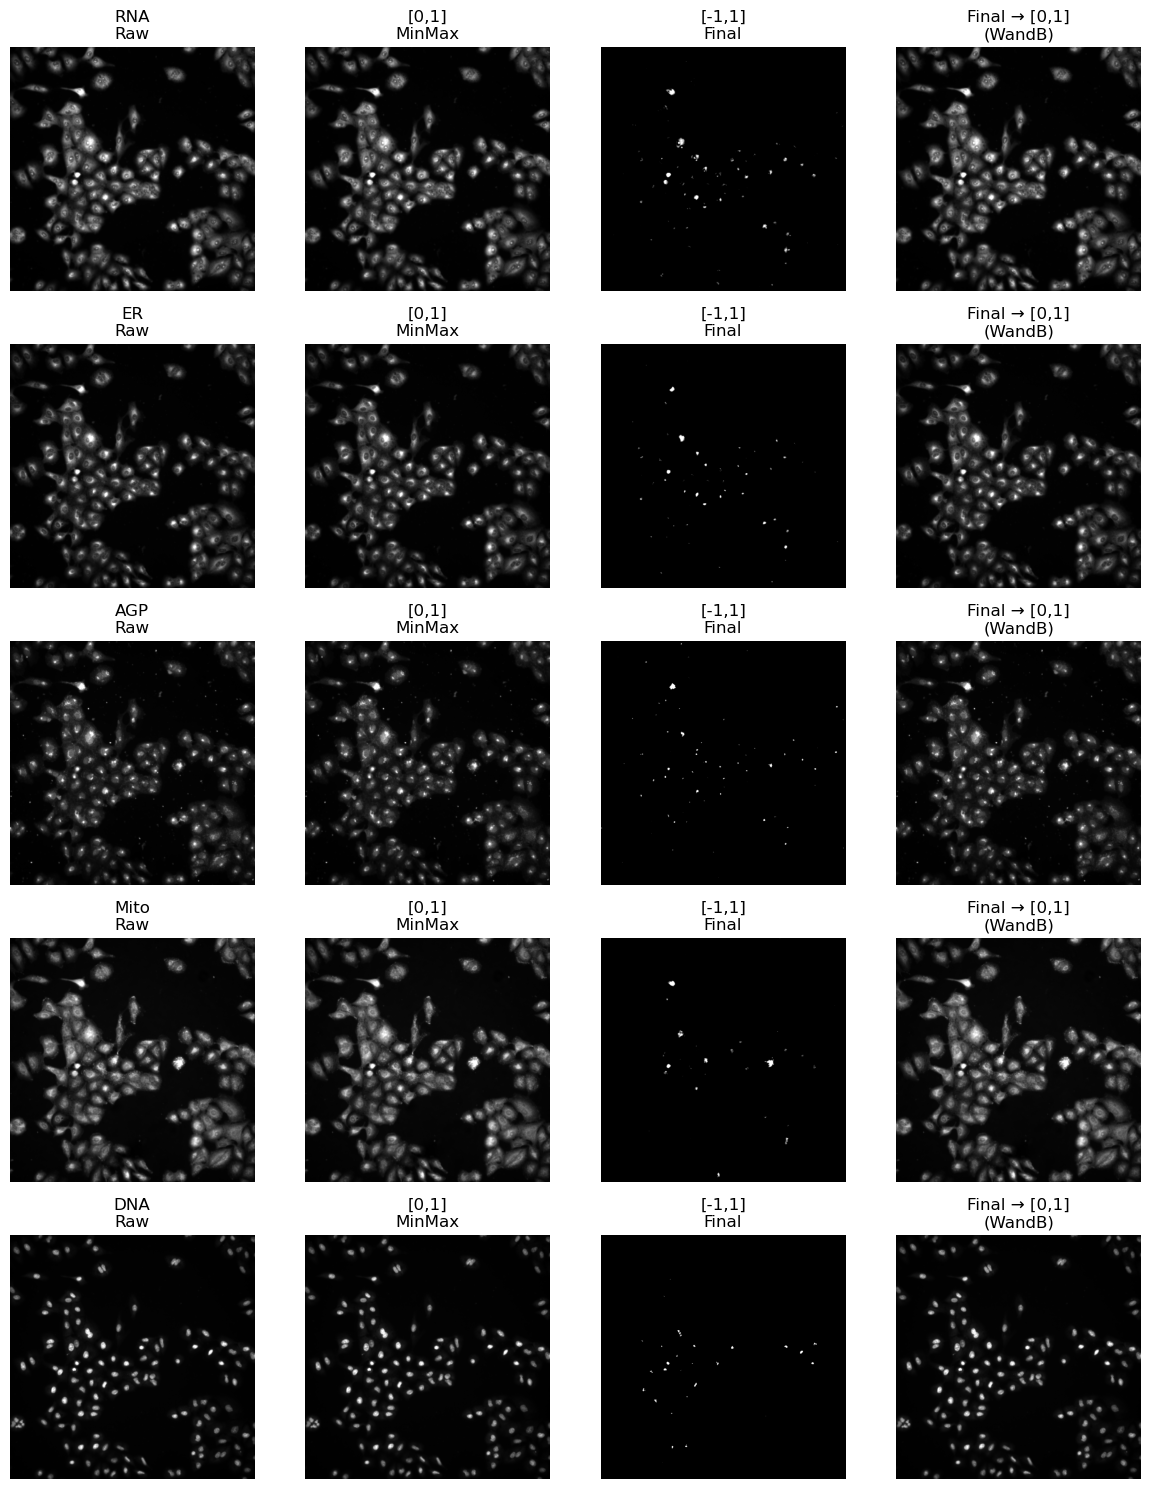

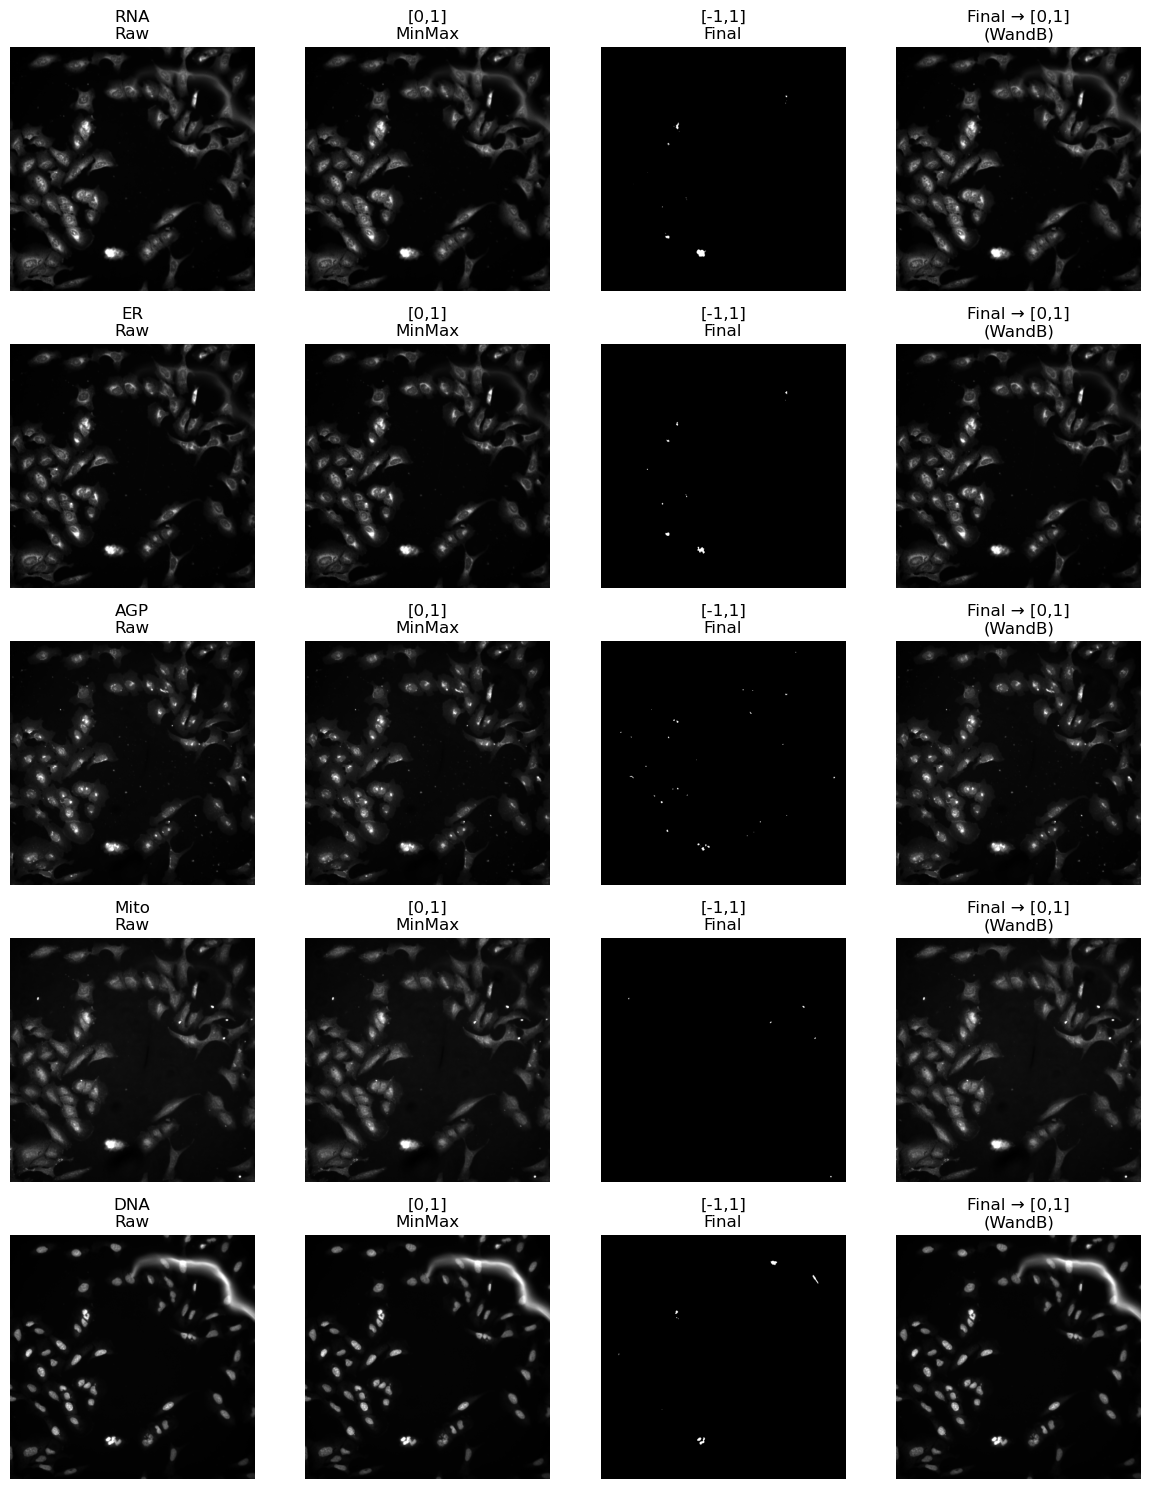

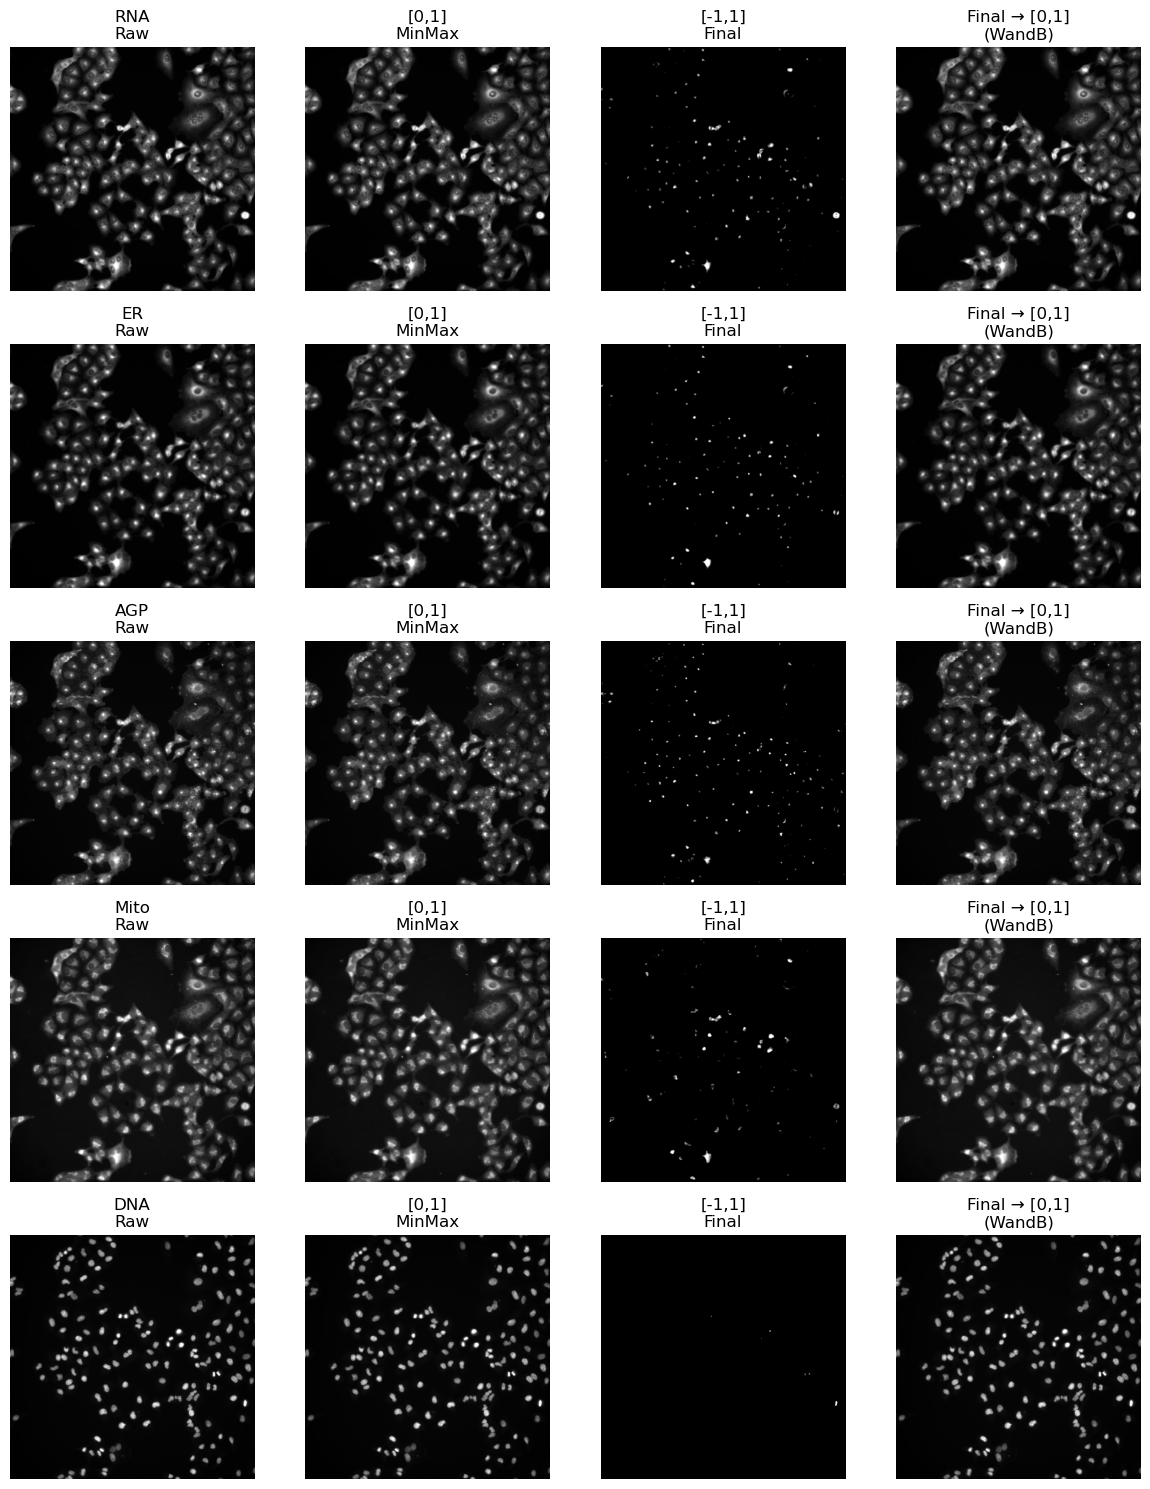

IndexError: list index out of range

In [33]:
data_path = "../../data/jump_0.1percent/val/shard_00000060.tar"
dataset = wds.WebDataset(data_path)
samples = list(iter(dataset))

# Pick a random sample
idx = 5  # random.randint(0, len(samples)-1)
sample = samples[idx]

for i in range(10):
    show_pipeline_comparison_four_columns(
        samples[i], channels=["RNA", "ER", "AGP", "Mito", "DNA"], percentile=99.9
    )